In [1]:
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
library(ggpubr)
library(ggplot2)


Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
df<-read.csv("03_Cytokine_TCR_Stim/Cytokine_Profile.csv")
df$timepoint<-factor(df$timepoint,levels=c("4 hrs", "24 hrs"))
df$Age_Group<-factor(df$Age_Group,levels=c("Young", "Older"))

In [5]:
write.csv(df %>% filter(Cytokine %in% c("IL4"))%>% select(donor,Cytokine,timepoint,Age_Group,Value),
          "/home/workspace/Source_Data/Fig5g.csv", row.names=FALSE)

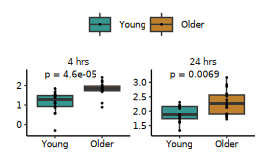

In [4]:
p<-ggplot(df %>% filter(Cytokine %in% c("IL4")), aes(x = Age_Group, y = log10(Value), 
                                       fill = `Age_Group`)) +
    geom_boxplot(outlier.shape = NA, lwd = 0.3) +
    geom_point(color = "black", size = 0.5, stroke = 0) +
    theme_classic(base_size = 6) +
    scale_fill_manual(values = c(Older = "#bf812d", 
                                 Young = "#35978f")) +
    xlab("") +
    ylab("") +
    scale_y_continuous(expand = expansion(mult = c(0.1, 0.15))) +
    theme(
        legend.position = "top", legend.title = element_blank(), axis.line = element_line(colour = "black"), 
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.border = element_blank(), panel.background = element_blank(), 
        strip.background = element_rect(linewidth = 0), 
        axis.title.x = element_text(margin = margin(t = 1))
    ) +
    stat_compare_means( size = 1.76, label = "p.format",bracket.size = 0.2)+ theme(
  axis.title   = element_text(color = "black"),
  axis.text    = element_text(color = "black")
)+facet_wrap(~timepoint,scale="free_y")
options(repr.plot.width = 55/25.4, repr.plot.height = 35/25.4)

p
ggsave('FigureG.pdf', p, 
       width = 55/25.4, 
       height = 35/25.4)